# Day 5:  Matplotlib

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams["font.family"] = "Serif"

vecsp=pd.read_csv("../data/Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")

## 1.  Scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

"Average savings" is a misnomer, since it is the "Total Savings" for the year.

plot saved in "../figures/DAY5_fig1.ps"


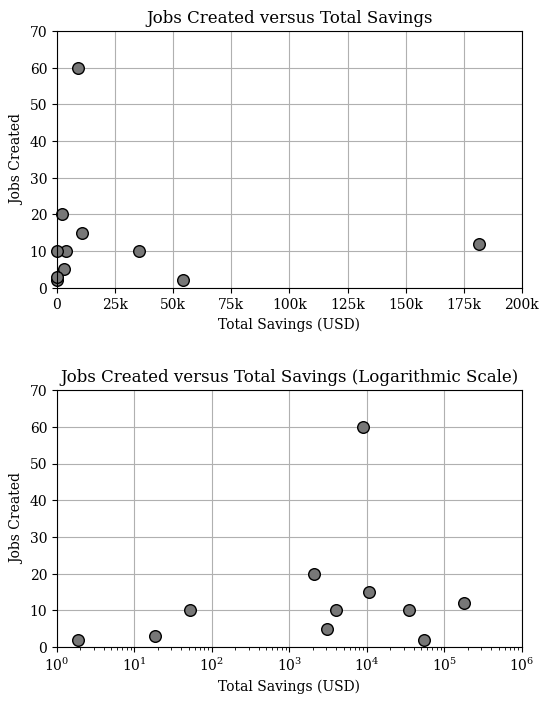

In [3]:
fig1,axs1 = plt.subplots(2,1,figsize=(6,8))

axs1[0].grid()
axs1[0].set_axisbelow(True)
axs1[0].set_title("Jobs Created versus Total Savings")
axs1[0].set_xlabel("Total Savings (USD)")
axs1[0].set_ylabel("Jobs Created")
axs1[0].set_xticks(np.arange(0,225000,25000))
axs1[0].set_xticklabels(["0","25k","50k","75k","100k","125k","150k","175k","200k"])
axs1[0].axis([0,200000,0,70])
axs1[0].scatter(vecsp["Total Savings"],vecsp["Job created"],s=70,facecolor='#777777',edgecolor='k',clip_on=False)

axs1[1].grid()
axs1[1].set_axisbelow(True)
axs1[1].set_title("Jobs Created versus Total Savings (Logarithmic Scale)")
axs1[1].set_xlabel("Total Savings (USD)")
axs1[1].set_ylabel("Jobs Created")
axs1[1].axis([1,1000000,0,70])
axs1[1].set_xscale('log')
axs1[1].scatter(vecsp["Total Savings"],vecsp["Job created"],s=70,facecolor='#777777',edgecolor='k',clip_on=False)


plt.subplots_adjust(hspace=0.4)

plt.savefig("../figures/DAY5_fig1.ps")
print("plot saved in \"../figures/DAY5_fig1.ps\"")
plt.show()


## 2.  Histogram of the log of the average total savings.

plot saved in "../figures/DAY5_fig2.ps"


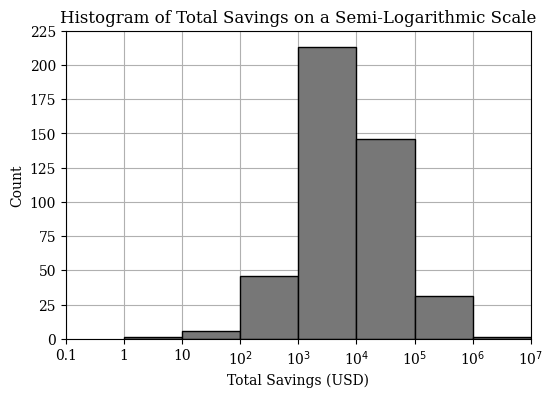

In [4]:
vecsp["log savings"]=vecsp["Total Savings"].apply(lambda x: np.log10(x) if x>0.01 else np.nan)

fig2,ax2 = plt.subplots(figsize=(6,4))

ax2.set_title("Histogram of Total Savings on a Semi-Logarithmic Scale")
ax2.set_ylabel("Count")
ax2.set_xlabel("Total Savings (USD)")
ax2.grid()
ax2.set_xticks(np.arange(-1,8))
ax2.set_xticklabels(["0.1","1","10","10$^2$","10$^3$","10$^4$","10$^5$","10$^6$","10$^7$"])
ax2.axis([-1,7,0,225])
ax2.set_axisbelow(True)
ax2.hist(vecsp["log savings"],bins=np.arange(10),density=False,edgecolor='black',color='#777777')

plt.savefig('../figures/DAY5_fig2.ps')
print("plot saved in \"../figures/DAY5_fig2.ps\"")
plt.show()

## 3.  Line plot of the total jobs created for each month.

This one seems ambiguous.  The "total jobs created" is a yearly total, and the only date provided is the date that the company started the program.  This makes a monthly total inaccessible.  I provide the following to plots instead.

1) I use the month found in "Effective Date" to group the data.  This is a "if you have a hammer, everything looks like a nail" approach.
2) If the only data available is a yearly total, the best apporximation by month would be the yearly total divided by 12.  This is a "technically correct, but useless" approach.

plot saved in "../figures/DAY5_fig3.ps"


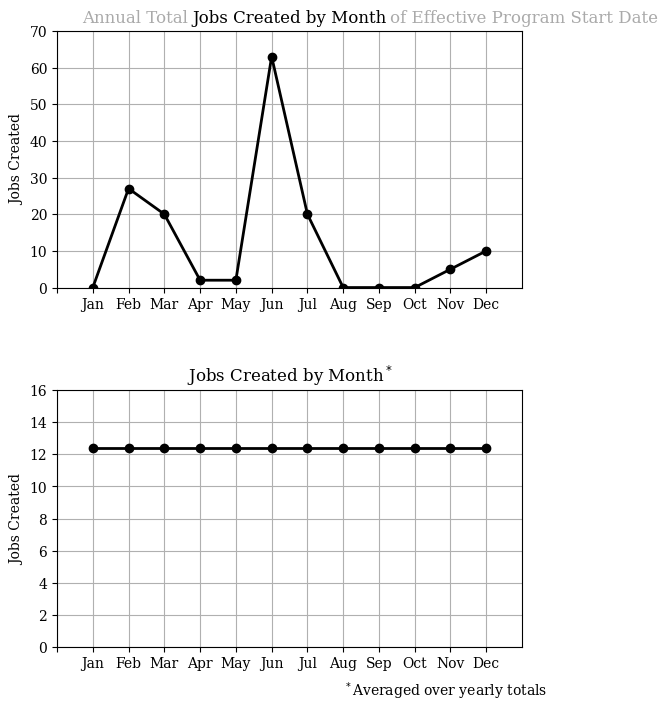

In [12]:
vecsp["Effective Date"]=pd.to_datetime(vecsp["Effective Date"])

jobs_by_month=vecsp.groupby(vecsp['Effective Date'].dt.month)["Job created"].sum()

fig3,axs3 = plt.subplots(2,1,figsize=(6,8))

axs3[0].set_ylabel("Jobs Created")
axs3[0].text(0.7,72.3,"Annual Total",c='#aaaaaa',size=12)
axs3[0].text(9.3,72.3,"of Effective Program Start Date",c='#aaaaaa',size=12)
axs3[0].set_title("Jobs Created by Month")
axs3[0].set_xticks(np.arange(13))
axs3[0].set_xticklabels(['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
axs3[0].grid()
axs3[0].axis([0,13,0,70])
axs3[0].plot(jobs_by_month,linewidth=2,color='black',marker='o')

mnths=np.arange(1,13)
jobs=np.ones(12)*vecsp["Job created"].sum()/12

axs3[1].set_ylabel("Jobs Created")
axs3[1].set_title("Jobs Created by Month$^*$")
axs3[1].text(8,-3,"$^*$Averaged over yearly totals")
axs3[1].set_xticks(np.arange(13))
axs3[1].set_xticklabels(['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
axs3[1].grid()
axs3[1].axis([0,13,0,16])
axs3[1].plot(mnths,jobs,linewidth=2,color='black',marker='o')

plt.subplots_adjust(hspace=0.4)
plt.savefig('../figures/DAY5_fig3.ps')
print("plot saved in \"../figures/DAY5_fig3.ps\"")
plt.show()